# ラムゼーモデルの局所動学

### 経済動学 講義資料

神戸大学 佐藤健治

2015-5-25

https://bitbucket.org/kenjisato/economic_dynamics

See https://bitbucket.org/kenjisato/economic_dynamics/src/0230a3f1c5b7075b77e9a23611e56d743bbbc903/Codes/2015-05-25/?at=master

In [1]:
%matplotlib inline

## 目標

1部門モデルを考える. 

生産関数と効用関数を特定化して、オイラー条件

\begin{align}
    u_2(k_{t-1}, k_t) + \rho u_1(k_t, k_{t+1}) = 0
\end{align}

によって定まる力学系を可視化したい

3つのプログラミング・パラダイム

1. 手続き型
1. オブジェクト指向
1. [Optional] 関数型

## 手続き型 (素朴な方法)

### パラメータ

In [2]:
## Unicode identifiers are only valid in Python3
## In Python2, use less readable notation such as
# alpha = 0.4
# rho = 0.9

A = 1.1 
α = 0.4
ρ = 0.9 

### 生産関数 
\begin{align}
    f(k) = Ak^\alpha
\end{align}

In [3]:
def f(k):
    return A * k ** α

### 消費の効用関数

\begin{align}
    U(c) = \log c
\end{align}

In [4]:
from math import log

def U(c):
    return log(c)

### 規約型効用関数

\begin{align}
    u(x, y) = U(f(x) - y)
\end{align}

In [5]:
def u(x, y):
    return U(f(x) - y)

### オイラー条件

\begin{align}
    u_2(k_{t-1}, k_t) = \frac{-1}{Ak_{t-1}^\alpha - k_t}\\
    u_1(k_t, k_{t+1}) = \frac{\alpha A k_t^{\alpha - 1}}{Ak_t^\alpha - k_{t+1}}
\end{align}

より

\begin{align}
    k_{t+1} = F(k_{t-1}, k_t) = (1+\rho \alpha) A k_t^\alpha - \rho \alpha A^2 k_{t-1}^\alpha k_t^{\alpha-1}
\end{align}

In [6]:
def F(x, y):
    return ((1 + ρ * α) * A * y ** α 
            - ρ * α * (A ** 2) * (x ** α) * (y ** (α - 1)))

### 相空間上の力学系

In [7]:
def G(x):
    return [
            x[1],
            F(x[0], x[1])
        ]

### シミュレーション

In [8]:
duration = 4
x0 = [0.8, 0.43]

x = x0[:]
for t in range(duration):
    print(x)
    x = G(x)

[0.8, 0.43]
[0.43, 0.4063168783383537]
[0.4063168783383537, 0.509937247085211]
[0.509937247085211, 0.6875981937381642]


以上をまとめたものが listing01.py

In [9]:
%cat listing01.py

#!/usr/bin/env python3

from math import log

## Unicode identifiers are only valid in Python3
## In Python2, use less readable notation such as
# alpha = 0.4
# rho = 0.9

A = 1.1
α = 0.4
ρ = 0.9


def f(k):
    """Production function"""
    return A * k ** α


def U(c):
    """Utility function"""
    return log(c)

def u(x, y):
    """Reduced form utility function"""
    return U(f(x) - y)


def F(x, y):
    """Solution of Euler equation"""
    return ((1 + ρ * α) * A * y ** α
            - ρ * α * (A ** 2) * (x ** α) * (y ** (α - 1)))


def G(x):
    """Dynamical system"""
    return [
            x[1],
            F(x[0], x[1])
        ]

if __name__ == "__main__":

    duration = 4
    x0 = [0.8, 0.43]

    x = x0[:]
    for t in range(duration):
        print(x)
        x = G(x)


### 補足

    if __name__ == "_main__":
        [do something]
        
        
これはPythonのイディオムで、 `import`文で呼び出された場合には実行されずに、`run` で呼び出された場合には実行されます.  

### 可視化の基本

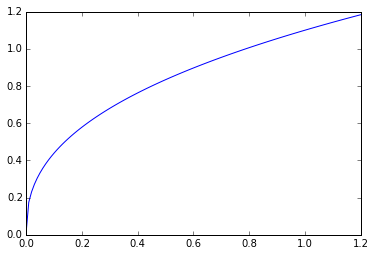

In [10]:
# listing02.py

import numpy as np
import matplotlib.pyplot as plt   # プロッティング・ライブラリを読み込む
from listing01 import f

fig = plt.figure()
ax = fig.add_subplot(111)   # 作図領域の作成

grids = np.linspace(0.0, 1.2, 120)
ax.plot(grids, f(grids))

plt.show()   # 図の表示

### 軌道の可視化

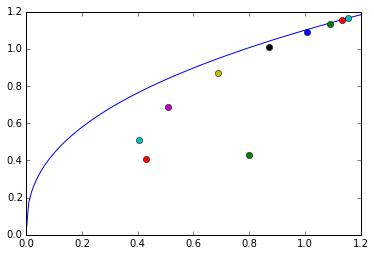

In [11]:
# listing03.py

import matplotlib.pyplot as plt
from listing01 import f, G

duration = 10
x0 = [0.8, 0.43]

fig = plt.figure()
ax = fig.add_subplot(111)

grids = np.linspace(0.0, 1.2, 120)
ax.plot(grids, f(grids))

x = x0[:]
for t in range(duration):
    ax.plot(x[0], x[1], marker='o', linestyle='')
    x = G(x)
    
plt.show()

これでは動きが分からない .... 

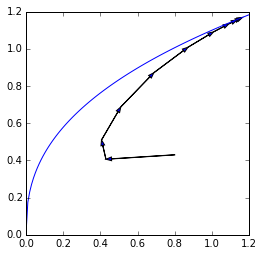

In [12]:
# listing04.py

import numpy as np
import matplotlib.pyplot as plt
from listing01 import f, G

duration = 10
x0 = [0.8, 0.43]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

grids = np.linspace(0.0, 1.2, 120)
ax.plot(grids, f(grids))


x = x0[:]
for t in range(duration):
    x1 = G(x)
    dx = [x1[0] - x[0], x1[1] - x[1]]
    ax.plot(x[0], x[1], marker='', linestyle='', color='black')
    ax.arrow(x[0], x[1], dx[0], dx[1], length_includes_head=True)
    x = x1
plt.show()


## OOP

対象と動作をまとめてやる. たとえば次のような記法でシミュレーションができるようにしたい. 

    >>> ramsey = Ramsey(A=1.1, α=0.4, ρ=0.9)
    >>> sim = Simulation(ramsey, x0=[0.8, 0.43], duration=5)
    >>> path = [x for x in sim]
    >>> path
    [[0.8, 0.43],
     [0.43, 0.4063168783383537],
     [0.4063168783383537, 0.5099372470852112],
     [0.5099372470852112, 0.6875981937381646],
     [0.6875981937381646, 0.8712750948974344]]
    

In [13]:
# listing05.py の一部

class Ramsey:
    """One-sector Ramsey model"""

    def __init__(self, A, α, ρ):
        self.A = A
        self.α = α
        self.ρ = ρ

    def f(self, x):
        return self.A * x ** self.α

    def U(self, x):
        return log(x)

    def u(self, x, y):
        return self.U(self.f(x) - y)

    def forward(self, x):
        """1ステップの時間発展"""
        A, α, ρ = self.A, self.α, self.ρ
        return [
            x[1],
            (1 + ρ * α) * A * x[1] ** α - ρ * α * (A ** 2) * (x[1] ** (α - 1)) * (x[0] ** α)
        ]

In [14]:
# listing05.py の一部

class Simulation:
    """Simulation of a dynamical system"""

    def __init__(self, sys, x0, duration):
        self.sys = sys
        self.x0 = x0
        self.duration = duration

    def __iter__(self):
        x = self.x0[:]
        for _ in range(self.duration):
            yield x
            x = self.sys.forward(x)

In [15]:
ramsey = Ramsey(A=1.1, α=0.4, ρ=0.9)
sim = Simulation(ramsey, x0=[0.8, 0.43], duration=5)

path = [x for x in sim]
path

[[0.8, 0.43],
 [0.43, 0.4063168783383537],
 [0.4063168783383537, 0.5099372470852112],
 [0.5099372470852112, 0.6875981937381646],
 [0.6875981937381646, 0.8712750948974344]]

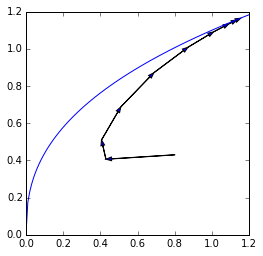

In [16]:
# listing05.py の一部

ramsey = Ramsey(A=1.1, α=0.4, ρ=0.9)
sim = Simulation(ramsey, x0=[0.8, 0.43], duration=10)

fig, ax = plt.subplots(subplot_kw={'aspect':'equal'})

grids = np.linspace(0.0, 1.2, 120)
ax.plot(grids, ramsey.f(grids))

for i, x in enumerate(sim):
    if i == 0:
        ax.plot(x[0], x[1], marker='', linestyle='', color='black')
    else:        
        dx = [x[0] - x0[0], x[1] - x0[1]]
        ax.plot(x[0], x[1], marker='', linestyle='', color='black')
        ax.arrow(x0[0], x0[1], dx[0], dx[1], length_includes_head=True)    
    x0 = x[:]

初期値を変えてシミュレーションしたものを重ねることも簡単にできる. `Simulation` クラスを書き換える. 

In [17]:
# listing06.py の一部

class Simulation:
    """__init__ と __iter__ は変更なし"""

    def reset(self, *, x0=None, duration=None):
        if x0 is not None:
            self.x0 = x0[:]
        if duration is not None:
            self.duration = duration

    def plot(self, ax):
        for i, x in enumerate(self):
            if i == 0:
                ax.plot(x[0], x[1], marker='', linestyle='', color='black')
            else:
                dx = [x[0] - x0[0], x[1] - x0[1]]
                ax.plot(x[0], x[1], marker='', linestyle='', color='black')
                ax.arrow(x0[0], x0[1], dx[0], dx[1], length_includes_head=True)
            x0 = x[:]

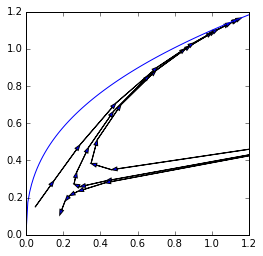

In [18]:
%run listing06

初期値を決めたときに、軌道を計算・プロットする方法の説明は終わり.

残る問題は安定多様体上の軌道をどのように計算するか？

長期均衡に収束するような初期値をなんとか探せばよい 

あるいは、このモデルなら**長期均衡の近傍から出発する逆向きの軌道を計算する**方がスマートにできる. 生産関数と効用関数の特定化次第では逆向きの時間発展が計算できる. ヤコビアンの安定固有ベクトル方向に摂動を加えて、逆向きに時間発展させれば安定多様体上の軌道が計算できるはず 